[]

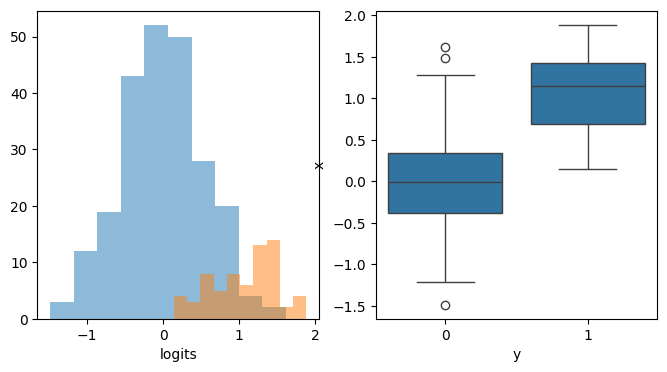

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import seaborn as sns

n_samples = 300

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
labels = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])
predictions = labels + 0.5 * np.random.randn(n_samples)

plt.sca(axes[0])
plt.hist(predictions[labels == 0], alpha = 0.5)
plt.hist(predictions[labels == 1], alpha = 0.5)
plt.xlabel('logits')

plt.sca(axes[1])
df_plot = pd.DataFrame({'x': predictions, 'y': labels})
sns.boxplot(data = df_plot, x = 'y', y = 'x')
plt.plot()

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
predictions

array([ 1.14690407e-01,  3.69601685e-01,  6.69191719e-01,  1.36069015e+00,
       -1.21178456e-01,  1.93658455e-01, -1.33688781e+00, -9.47008191e-02,
        1.85818747e+00,  7.46397657e-01,  1.23481111e+00,  1.62568697e+00,
        2.12763960e-01,  7.90069077e-01,  1.24233603e+00,  2.36312358e-01,
       -1.63729408e+00, -5.06606229e-01, -1.01577476e+00, -3.58010341e-01,
        4.65336982e-01,  1.37085090e+00,  5.58979390e-02, -5.37332499e-01,
       -8.37105920e-01,  1.50876850e+00,  7.98085770e-01,  1.04013492e+00,
       -1.77552033e+00, -5.83172338e-01,  2.44207081e-01, -7.40671226e-01,
       -9.23276308e-01, -4.55600923e-01,  1.17687031e+00,  2.01270843e+00,
       -3.75787954e-01, -7.82633652e-02,  8.43920968e-01,  5.66753438e-01,
        1.99592812e+00,  4.72540378e-01, -7.24121045e-01,  1.53337188e-01,
       -1.16079198e+00,  7.98593744e-01, -2.53527759e-01, -4.02717682e-01,
        6.13880668e-01, -1.12578643e-01,  2.77314764e-02,  7.62554126e-01,
        9.43514027e-01,  

In [ ]:
c = 0.5
acc = np.mean((predictions > c) == labels)
print(f'cutoff: {c}, accuracy: {acc}')

cutoff: 0.5, accuracy: 0.83


In [ ]:
c = 0.8
acc = np.mean((predictions > c) == labels)
print(f'cutoff: {c}, accuracy: {acc}')

cutoff: 0.8, accuracy: 0.8866666666666667


In [ ]:
c = 0.2
acc = np.mean((predictions > c) == labels)
print(f'cutoff: {c}, accuracy: {acc}')

cutoff: 0.2, accuracy: 0.7233333333333334


In [ ]:
res = []
for c in [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]:
  pred = (predictions > c)
  acc = np.mean(pred == labels)
  precision = np.mean(labels[pred])
  TPR = np.mean(pred[labels == 1])
  FNR = np.mean(pred[labels == 0])
  res.append([c, acc, precision, TPR, FNR])
pd.DataFrame(res, columns = ['cutoff', 'accuracy', 'precision', 'TPR/recall', 'FNR'])

,cutoff,accuracy,precision,TPR/recall,FNR
0,0.10,0.693333,0.421384,1.000000,0.394850
1,0.25,0.746667,0.467153,0.955224,0.313305
2,0.50,0.830000,0.576923,0.895522,0.188841
3,0.75,0.873333,0.716418,0.716418,0.081545
4,0.90,0.886667,0.811321,0.641791,0.042918
5,0.99,0.896667,0.875000,0.626866,0.025751


   cutoff     x:FNR     y:TPR
0     0.1  0.394850  1.000000
1     0.5  0.188841  0.895522
2     0.9  0.042918  0.641791


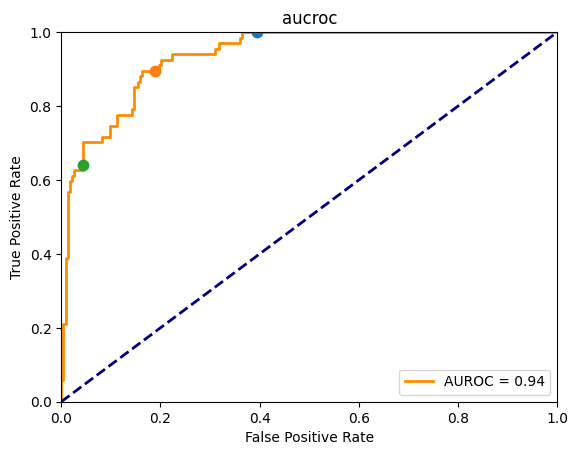

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

# Function to plot ROC curve and calculate AUROC
def plot_roc_curve(labels, predictions, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(labels, predictions)
    roc_auc = auc(fpr, tpr)
    #plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUROC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    #plt.show()

n_samples = 300

plot_roc_curve(labels, predictions, title='aucroc')

res = []
for c in [0.1, 0.5, 0.9]:
  TPR = np.mean((predictions > c)[labels == 1])
  FNR = np.mean((predictions > c)[labels == 0])
  plt.plot(FNR, TPR, '.', markersize=15)
  res.append([c, FNR, TPR])
print(pd.DataFrame(res, columns = ['cutoff', 'x:FNR', 'y:TPR']))

0.55
0.74
0.8333333333333334


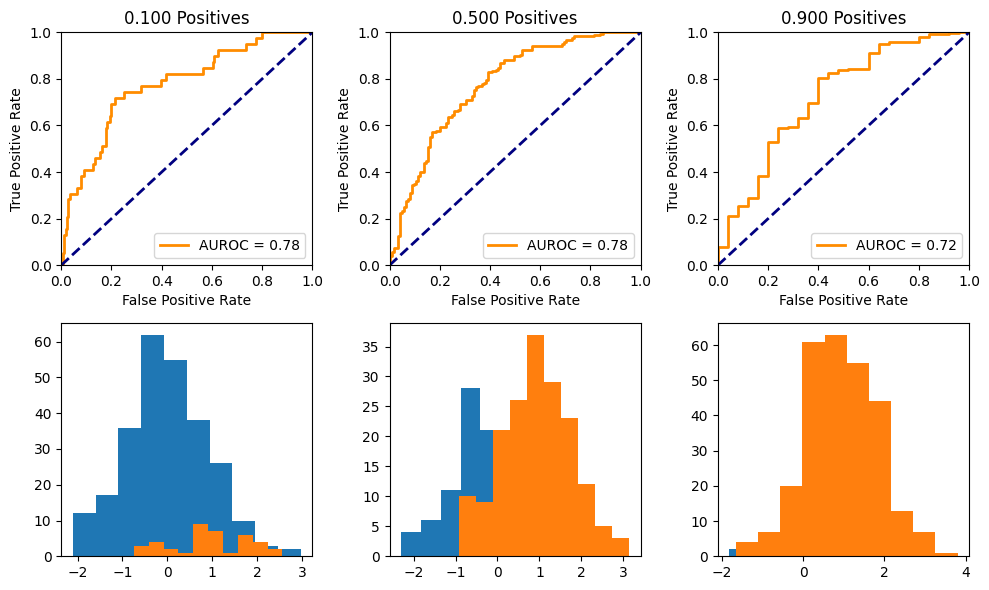

In [ ]:
n_samples = 300

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ip, p in enumerate([0.1, 0.5, 0.9]):
  labels = np.random.choice([0, 1], size=n_samples, p=[1-p, p])
  predictions = labels + 0.9 * np.random.randn(n_samples)

  plt.sca(axes[1, ip])
  plt.hist(predictions[labels == 0])
  plt.hist(predictions[labels == 1])
  plt.sca(axes[0, ip])
  plot_roc_curve(labels, predictions, title=f'%.3f Positives' % p)
  print(np.sum((predictions > 0) == labels) / n_samples)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
import pandas as pd
n_samples = 300

table = []
for ip, p in enumerate([0.1, 0.5, 0.9]):
  labels = np.random.choice([0, 1], size=n_samples, p=[1-p, p])
  pred_ = labels + 0.7 * np.random.randn(n_samples)
  pred_cutoff = pred_ > 0.5
  pred_allzero = np.zeros(n_samples)
  pred_random = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])

  acc_cutoff = np.sum(pred_cutoff == labels) / n_samples
  acc_allzero = np.sum(pred_allzero == labels) / n_samples
  acc_random = np.sum(pred_random == labels) / n_samples

  auroc_cutoff = roc_auc_score(labels, pred_)
  auroc_allzero = roc_auc_score(labels, pred_allzero)
  auroc_random = roc_auc_score(labels, pred_random)

  table += [[p, acc_cutoff, acc_allzero, acc_random, auroc_cutoff, auroc_allzero, auroc_random]]
pd.DataFrame(table, columns = ['%positives', 'acc_cutoff', 'acc_allzero', 'acc_random', 'aucroc_cutoff', 'aucroc_allzero', 'aucroc_random'])

,%positives,acc_cutoff,acc_allzero,acc_random,aucroc_cutoff,aucroc_allzero,aucroc_random
0,0.1,0.763333,0.890000,0.530000,0.865850,0.5,0.457099
1,0.5,0.783333,0.453333,0.503333,0.853434,0.5,0.506815
2,0.9,0.736667,0.113333,0.503333,0.835029,0.5,0.553184


In [ ]:
table = []
n_samples = 1000
labels = np.random.choice([0, 1], size=n_samples, p=[0.99, 0.01])
for ip, p in enumerate([0.3, 0.5, 0.8, 0.9]):
  pred_ = labels + p * np.random.randn(n_samples)
  pred_cutoff = pred_ > 0.5

  acc = np.sum(pred_cutoff == labels) / n_samples
  precision = np.sum((pred_cutoff == 1) & (labels == 1)) / np.sum(pred_cutoff == 1)
  recall = np.sum((pred_cutoff == 1) & (labels == 1)) / np.sum(labels == 1)
  auroc = roc_auc_score(labels, pred_)

  table += [[p, acc, precision, recall, auroc]]
pd.DataFrame(table, columns = ['noise level', 'acc', 'precision', 'recall', 'aucroc'])

,noise level,acc,precision,recall,aucroc
0,0.3,0.951,0.172414,0.909091,0.974998
1,0.5,0.849,0.056962,0.818182,0.897325
2,0.8,0.751,0.035156,0.818182,0.890891
3,0.9,0.723,0.028369,0.727273,0.792352
